In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing dataset
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   PedigreeFunc  Age  Outcome  
0         0.627   50        1  
1         0.351   31        0  
2         0.672   32        1  
3         0.167   21        0  
4         2.288   33        1  


In [3]:
healthy = diabetes_data[diabetes_data['Outcome'] == 0]
non_healthy = diabetes_data[diabetes_data['Outcome'] == 1]

In [4]:
# Data Preprocessing
# handling the zero values in the columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', \
                      'Insulin', 'BMI']

for column in columns_to_replace:
    healthy_mean_value = healthy.loc[healthy[column] != 0, column].mean()
    healthy.loc[healthy[column] == 0, column] = healthy_mean_value
    non_healthy_mean_value = non_healthy.loc[non_healthy[column] != 0,\
                                                 column].mean()
    non_healthy.loc[non_healthy[column] == 0, column] = \
                                            non_healthy_mean_value

df = pd.concat([healthy, non_healthy], ignore_index=True)


In [5]:
# Build a Deep learning model with a hidden layer with 24 nodes and the output layer with one node.
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                          train_size=0.76,random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

network1 = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#Compile and train the model
network1.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

n_epochs = 400
history = network1.fit(X_train_scaled, y_train, epochs=n_epochs,
                       batch_size=48,validation_split=0.20, verbose=0)

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

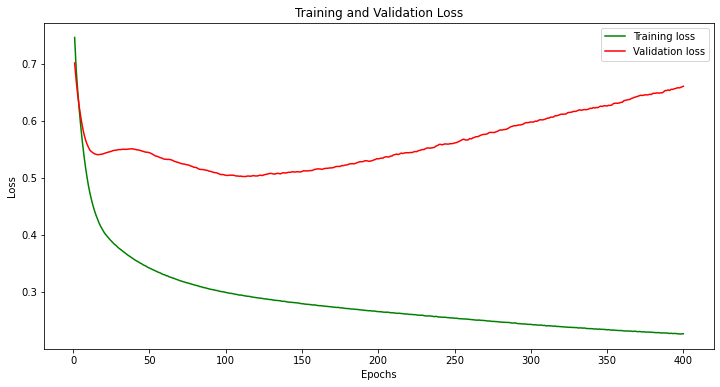

In [6]:
# line plot to visualize the change in training and validation loss over epochs.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
#Detecting overfitting 
dfnew = pd.DataFrame(history.history)
dfnew.index = range(1,401)
# dfnew

dfnew[dfnew.val_loss==dfnew.val_loss.min()]
optimal_epochs  = dfnew['val_loss'].idxmin()
print("The model starts overfitting at",optimal_epochs,"epochs")

The model starts overfitting at 113 epochs


In [8]:
#Retraining te model
network1 = keras.Sequential([
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
network1.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history = network1.fit(X_train_scaled, y_train, epochs=optimal_epochs,
                       batch_size=48, verbose=0)


In [9]:
# Evaluate and print metrics for this model (loss, accuracy, F1 score, precision, recall)

y_pred_probs = network1.predict(X_test_scaled)

# Converting predicted probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

f1_score_value = f1_score(y_test, y_pred)
precision_value = precision_score(y_test, y_pred)
recall_value = recall_score(y_test, y_pred)
test_loss, test_accuracy = network1.evaluate(X_test_scaled, y_test)

print("Test Loss: ", test_loss)
print("Test Accuracy Rate: ", test_accuracy)
print("F1 Score: ", f1_score_value)
print("Precision: ", precision_value)
print("Recall: ", recall_value)

# Printing the complete classification report as well
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)


6/6 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.8324
Test Loss:  0.42430993914604187
Test Accuracy Rate:  0.8324324488639832
F1 Score:  0.7669172932330828
Precision:  0.8225806451612904
Recall:  0.7183098591549296
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       114
           1       0.82      0.72      0.77        71

    accuracy                           0.83       185
   macro avg       0.83      0.81      0.82       185
weighted avg       0.83      0.83      0.83       185



In [10]:
# Build a Deep learning model with 2 hidden layers with 32 and 16 nodes and the output layer with one node.
network2 = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

network2.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

n_epochs = 400
history = network2.fit(X_train_scaled, y_train, epochs=n_epochs,
                       batch_size=48,validation_split=0.20, verbose=0)

history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

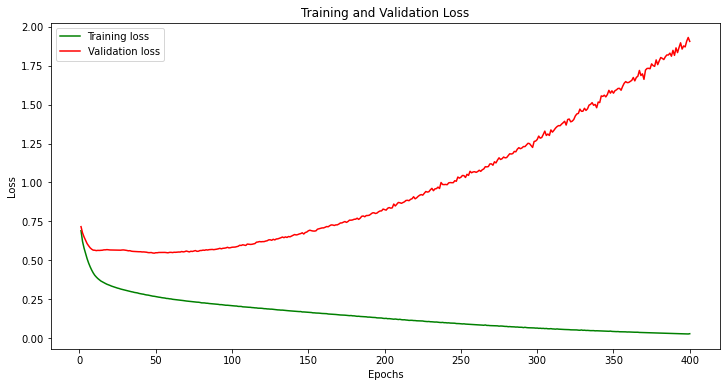

In [11]:
# line plot to visualize the change in training and validation loss over epochs.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
#Detecting overfitting 
dfnew = pd.DataFrame(history.history)
dfnew.index = range(1,401)
dfnew[dfnew.val_loss==dfnew.val_loss.min()]
optimal_epochs = dfnew['val_loss'].idxmin()
print("The model starts overfitting at",optimal_epochs,"epochs")

The model starts overfitting at 49 epochs


In [13]:
#Retraining te model
network2 = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

network2.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

history = network2.fit(X_train_scaled, y_train, epochs=optimal_epochs,
                       batch_size=48, verbose=0)

In [14]:
# Evaluate and print metrics (loss, accuracy, F1 score, precision, recall)

y_pred_probs = network2.predict(X_test_scaled)

# Converting predicted probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

f1_score_value = f1_score(y_test, y_pred)
precision_value = precision_score(y_test, y_pred)
recall_value = recall_score(y_test, y_pred)
test_loss, test_accuracy = network2.evaluate(X_test_scaled, y_test)

print("Test Loss: ", test_loss)
print("Test Accuracy Rate: ", test_accuracy)
print("F1 Score: ", f1_score_value)
print("Precision: ", precision_value)
print("Recall: ", recall_value)

# Printing the complete classification report as well
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)


6/6 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8162
Test Loss:  0.43670955300331116
Test Accuracy Rate:  0.816216230392456
F1 Score:  0.7462686567164178
Precision:  0.7936507936507936
Recall:  0.704225352112676
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.79      0.70      0.75        71

    accuracy                           0.82       185
   macro avg       0.81      0.80      0.80       185
weighted avg       0.81      0.82      0.81       185



## Conclusion

In this exploration of deep learning models, we successfully trained and evaluated two distinct architectures. The first model, featuring a single hidden layer with 24 nodes, demonstrated its ability to capture patterns in the data. On the other hand, the second model, incorporating two hidden layers with 32 and 16 nodes, showcased increased complexity, potentially capturing more intricate relationships.

As we consider the trade-off between model complexity and performance, further analysis and comparison of these metrics become crucial. Depending on the specific requirements of the task, such as precision, recall, or overall accuracy, the most suitable model can be chosen.

This exploration provides valuable insights into the performance of different deep learning architectures, paving the way for informed decision-making in selecting the optimal model for our predictive task.
